In [ ]:
from tables import start
start()

In [1]:
import pandas as pd
from value import Value
df = pd.read_csv("tables/218.tab", sep="\t", header=None)
# df = df.applymap(lambda x: Value(values=[x], syst=5), axis=1)
df[0] = df[0].apply(lambda x: Value(values=[x], syst=5))
df[1] = df[1].apply(lambda x: Value(values=[x], syst=0.5))
df[2] = df[1].apply(lambda x: x ** -1)
df

,0,1,2
0,204 ± 5,5.6 ± 0.5,0.179 ± 0.016
1,180 ± 5,6.3 ± 0.5,0.159 ± 0.013
2,160 ± 5,7.0 ± 0.5,0.143 ± 0.010
3,140 ± 5,7.8 ± 0.5,0.128 ± 0.008
4,120 ± 5,8.4 ± 0.5,0.119 ± 0.007
5,100 ± 5,9.5 ± 0.5,0.105 ± 0.006
6,80 ± 5,10.3 ± 0.5,0.097 ± 0.005
7,60 ± 5,11.8 ± 0.5,0.085 ± 0.004
8,40 ± 5,12.9 ± 0.5,0.078 ± 0.003


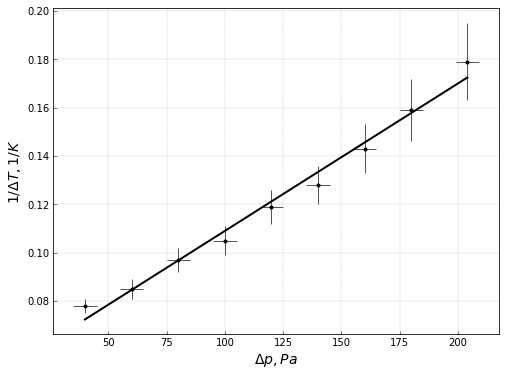

In [3]:
from plotter import Plotter
%matplotlib inline

fit = Plotter(draw_legend=False).set_name("218").set_title("").set_y_name("$1 / \\Delta T, 1 / K$").set_x_name(
        "$\\Delta p, Pa$"). \
        add_line(Plotter.get_new_line(y_value=df[2], x_value=df[0],
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True)

In [7]:
A = Value(values=[float(fit[0].a)], syst=float(fit[0].sigma_a))
W = Value(values=[3.77, 3.73, 3.72], syst=0.1)
p = Value(values=[101192], syst=100)
beta = Value(values=[1.91 * 10**-6], syst=0.08 * 10 ** -6)
R = Value(const=8.31)
T0 = Value(values=[298], syst=1)
print(((A * W * T0) / (beta * p) - 1) * 2)

5.0 ± 0.4
